In [1]:
# Import the required libraries and set plotting options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import matplotlib.dates as mdates

/Users/mohabarikbin/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
J2015 = pd.read_csv("pricequote2015q4.csv")
J2018 = pd.read_csv("price_quote_201806.csv")
J2022 = pd.read_csv("pricequotes202206.csv")

In [3]:
J2015.shape

(371984, 20)

In [4]:
J2015.head()

,quote_date,item_id,item_desc,validity,shop_code,price,indicator_box,orig_indicator,price_relative,log_price_relative,stratum_weight,stratum_type,start_date,end_date,region,shop_type,shop_weight,base_price,base_validity,stratum_cell
0,201510.0,210102.0,LARGE LOAF-WHITE-UNSLICED-800G,1.0,2.0,0.0,T,T,0.0,0.0,11.57,1.0,201502.0,201601.0,9.0,1.0,1.0,1.300,3.0,9.0
1,201510.0,210102.0,LARGE LOAF-WHITE-UNSLICED-800G,1.0,12.0,0.0,T,T,0.0,0.0,10.73,1.0,201506.0,201601.0,2.0,1.0,1.0,1.190,4.0,2.0
2,201510.0,210102.0,LARGE LOAF-WHITE-UNSLICED-800G,1.0,27.0,0.0,T,T,0.0,0.0,11.57,1.0,201504.0,201601.0,9.0,1.0,1.0,1.383,4.0,9.0
3,201510.0,210102.0,LARGE LOAF-WHITE-UNSLICED-800G,1.0,39.0,0.0,M,M,0.0,0.0,9.72,1.0,201503.0,201601.0,12.0,1.0,1.0,1.390,4.0,12.0
4,201510.0,210102.0,LARGE LOAF-WHITE-UNSLICED-800G,1.0,40.0,0.0,T,T,0.0,0.0,8.21,1.0,201502.0,201601.0,8.0,1.0,1.0,1.390,3.0,8.0


In [5]:
J2015.tail()

,quote_date,item_id,item_desc,validity,shop_code,price,indicator_box,orig_indicator,price_relative,log_price_relative,stratum_weight,stratum_type,start_date,end_date,region,shop_type,shop_weight,base_price,base_validity,stratum_cell
371979,201512.0,640406.0,HOTEL 1 NIGHT PRICE,4.0,5247.0,152.10,,,1.370,0.315,7.58,1.0,201502.0,201601.0,2.0,2.0,1.0,111.00,3.0,2.0
371980,201512.0,640406.0,HOTEL 1 NIGHT PRICE,4.0,5271.0,30.00,S,S,0.625,-0.470,9.85,1.0,201502.0,201601.0,4.0,2.0,1.0,48.00,3.0,4.0
371981,201512.0,640406.0,HOTEL 1 NIGHT PRICE,4.0,5291.0,56.00,,,0.933,-0.069,7.58,1.0,201502.0,201601.0,2.0,2.0,1.0,60.00,3.0,2.0
371982,201512.0,640406.0,HOTEL 1 NIGHT PRICE,4.0,14601.0,52.95,,,1.000,0.000,9.29,1.0,201502.0,201601.0,8.0,2.0,1.0,52.95,3.0,8.0
371983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
J2015.dtypes

quote_date                        float64
item_id                           float64
item_desc                          object
validity                          float64
shop_code                         float64
price                             float64
indicator_box                      object
orig_indicator                     object
price_relative                    float64
log_price_relative                float64
stratum_weight                    float64
stratum_type                      float64
start_date                        float64
end_date                          float64
region                            float64
shop_type                         float64
shop_weight                       float64
base_price                        float64
base_validity                     float64
stratum_cell                      float64
dtype: object

In [7]:
J2015.columns.values

array(['quote_date   ', 'item_id      ', 'item_desc                     ',
       'validity', 'shop_code', 'price      ', 'indicator_box',
       'orig_indicator', 'price_relative', 'log_price_relative',
       'stratum_weight', 'stratum_type', 'start_date   ', 'end_date     ',
       'region       ', 'shop_type', 'shop_weight', 'base_price ',
       'base_validity', 'stratum_cell'], dtype=object)

In [8]:
J2015.rename(columns = {'quote_date   ': 'quote_date', 'item_id      ': 'item_id', 'item_desc                     ': 'item_desc',
                        'price      ':'price',
                        'start_date   ': 'start_date', 'end_date     ':'end_date',
       'region       ':'region', 'base_price ':'base_price'}, inplace = True)


J2015.columns.values

array(['quote_date', 'item_id', 'item_desc', 'validity', 'shop_code',
       'price', 'indicator_box', 'orig_indicator', 'price_relative',
       'log_price_relative', 'stratum_weight', 'stratum_type',
       'start_date', 'end_date', 'region', 'shop_type', 'shop_weight',
       'base_price', 'base_validity', 'stratum_cell'], dtype=object)

In [9]:
J2018.columns.values

array(['QUOTE_DATE', 'ITEM_ID', 'ITEM_DESC', 'VALIDITY', 'SHOP_CODE',
       'PRICE', 'INDICATOR_BOX', 'ORIG_INDICATOR_BOX', 'PRICE_RELATIVE',
       'LOG_PRICE_RELATIVE', 'STRATUM_WEIGHT', 'STRATUM_TYPE',
       'START_DATE', 'END_DATE', 'REGION', 'SHOP_TYPE', 'SHOP_WEIGHT',
       'BASE_PRICE', 'BASE_VALIDITY', 'STRATUM_CELL'], dtype=object)

In [10]:
J2018.rename(columns = {'QUOTE_DATE':'quote_date', 'ITEM_ID':'item_id', 'ITEM_DESC':'item_desc', 'VALIDITY':'validity', 
                        'SHOP_CODE':'shop_code',
       'PRICE':'price', 'INDICATOR_BOX':'indicator_box', 'ORIG_INDICATOR_BOX':'orig_indicator', 'PRICE_RELATIVE':'price_relative',
       'LOG_PRICE_RELATIVE':'log_price_relative', 'STRATUM_WEIGHT':'stratum_weight', 'STRATUM_TYPE':'stratum_type',
       'START_DATE':'start_date', 'END_DATE':'end_date', 'REGION':'region', 'SHOP_TYPE':'shop_type', 'SHOP_WEIGHT':'shop_weight',
       'BASE_PRICE':'base_price', 'BASE_VALIDITY':'base_validity', 'STRATUM_CELL':'stratum_cell'}, inplace = True)

J2018.columns.values

array(['quote_date', 'item_id', 'item_desc', 'validity', 'shop_code',
       'price', 'indicator_box', 'orig_indicator', 'price_relative',
       'log_price_relative', 'stratum_weight', 'stratum_type',
       'start_date', 'end_date', 'region', 'shop_type', 'shop_weight',
       'base_price', 'base_validity', 'stratum_cell'], dtype=object)

In [11]:
J2022.columns.values

array(['QUOTE_DATE', 'ITEM_ID', 'ITEM_DESC', 'VALIDITY', 'SHOP_CODE',
       'PRICE', 'INDICATOR_BOX', 'ORIG_INDICATOR_BOX', 'PRICE_RELATIVE',
       'LOG_PRICE_RELATIVE', 'STRATUM_WEIGHT', 'STRATUM_TYPE',
       'START_DATE', 'END_DATE', 'REGION', 'SHOP_TYPE', 'SHOP_WEIGHT',
       'BASE_PRICE', 'BASE_VALIDITY', 'STRATUM_CELL'], dtype=object)

In [12]:
J2022.rename(columns = {'QUOTE_DATE':'quote_date', 'ITEM_ID':'item_id', 'ITEM_DESC':'item_desc', 'VALIDITY':'validity', 
                        'SHOP_CODE':'shop_code',
       'PRICE':'price', 'INDICATOR_BOX':'indicator_box', 'ORIG_INDICATOR_BOX':'orig_indicator', 'PRICE_RELATIVE':'price_relative',
       'LOG_PRICE_RELATIVE':'log_price_relative', 'STRATUM_WEIGHT':'stratum_weight', 'STRATUM_TYPE':'stratum_type',
       'START_DATE':'start_date', 'END_DATE':'end_date', 'REGION':'region', 'SHOP_TYPE':'shop_type', 'SHOP_WEIGHT':'shop_weight',
       'BASE_PRICE':'base_price', 'BASE_VALIDITY':'base_validity', 'STRATUM_CELL':'stratum_cell'}, inplace = True)

J2022.columns.values

array(['quote_date', 'item_id', 'item_desc', 'validity', 'shop_code',
       'price', 'indicator_box', 'orig_indicator', 'price_relative',
       'log_price_relative', 'stratum_weight', 'stratum_type',
       'start_date', 'end_date', 'region', 'shop_type', 'shop_weight',
       'base_price', 'base_validity', 'stratum_cell'], dtype=object)

In [13]:
# insert column year to each dataframe. 
J2015.insert(0, 'Year', '2015')
J2018.insert(0, 'Year', '2018')
J2022.insert(0, 'Year', '2022')

In [19]:
# stack/concat dataframes 
price_ind = pd.concat([J2015, J2018, J2022], ignore_index=True,axis=0)
price_ind

,Year,quote_date,item_id,item_desc,validity,shop_code,price,indicator_box,orig_indicator,price_relative,...,stratum_weight,stratum_type,start_date,end_date,region,shop_type,shop_weight,base_price,base_validity,stratum_cell
0,2015,201510.0,210102.0,LARGE LOAF-WHITE-UNSLICED-800G,1.0,2.0,0.00,T,T,0.000,...,11.57,1.0,201502.0,201601.0,9.0,1.0,1.0,1.300,3.0,9.0
1,2015,201510.0,210102.0,LARGE LOAF-WHITE-UNSLICED-800G,1.0,12.0,0.00,T,T,0.000,...,10.73,1.0,201506.0,201601.0,2.0,1.0,1.0,1.190,4.0,2.0
2,2015,201510.0,210102.0,LARGE LOAF-WHITE-UNSLICED-800G,1.0,27.0,0.00,T,T,0.000,...,11.57,1.0,201504.0,201601.0,9.0,1.0,1.0,1.383,4.0,9.0
3,2015,201510.0,210102.0,LARGE LOAF-WHITE-UNSLICED-800G,1.0,39.0,0.00,M,M,0.000,...,9.72,1.0,201503.0,201601.0,12.0,1.0,1.0,1.390,4.0,12.0
4,2015,201510.0,210102.0,LARGE LOAF-WHITE-UNSLICED-800G,1.0,40.0,0.00,T,T,0.000,...,8.21,1.0,201502.0,201601.0,8.0,1.0,1.0,1.390,3.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648747,2022,202206.0,640406.0,HOTEL 1 NIGHT PRICE,3.0,372.0,66.49,NaN,NaN,1.068,...,10.83,1.0,202202.0,999999.0,9.0,1.0,1.0,62.240,3.0,9.0
648748,2022,202206.0,640406.0,HOTEL 1 NIGHT PRICE,3.0,5059.0,84.00,NaN,NaN,1.448,...,10.83,1.0,202203.0,999999.0,9.0,1.0,1.0,58.013,4.0,9.0
648749,2022,202206.0,640406.0,HOTEL 1 NIGHT PRICE,3.0,5106.0,99.50,NaN,NaN,1.284,...,10.83,1.0,202202.0,999999.0,9.0,1.0,1.0,77.500,3.0,9.0
648750,2022,202206.0,640406.0,HOTEL 1 NIGHT PRICE,1.0,16123.0,0.00,T,T,0.000,...,7.80,1.0,202202.0,999999.0,12.0,1.0,1.0,60.000,3.0,12.0


In [22]:
# drop columns not needed 
price_index = price_ind.drop(columns=['quote_date', 'validity', 'shop_code',
        'indicator_box', 'orig_indicator', 
       'log_price_relative', 'stratum_weight', 'stratum_type',
       'start_date', 'end_date', 'shop_weight',
        'stratum_cell'])
price_index

,Year,item_id,item_desc,price,price_relative,region,shop_type,base_price,base_validity
0,2015,210102.0,LARGE LOAF-WHITE-UNSLICED-800G,0.00,0.000,9.0,1.0,1.300,3.0
1,2015,210102.0,LARGE LOAF-WHITE-UNSLICED-800G,0.00,0.000,2.0,1.0,1.190,4.0
2,2015,210102.0,LARGE LOAF-WHITE-UNSLICED-800G,0.00,0.000,9.0,1.0,1.383,4.0
3,2015,210102.0,LARGE LOAF-WHITE-UNSLICED-800G,0.00,0.000,12.0,1.0,1.390,4.0
4,2015,210102.0,LARGE LOAF-WHITE-UNSLICED-800G,0.00,0.000,8.0,1.0,1.390,3.0
...,...,...,...,...,...,...,...,...,...
648747,2022,640406.0,HOTEL 1 NIGHT PRICE,66.49,1.068,9.0,1.0,62.240,3.0
648748,2022,640406.0,HOTEL 1 NIGHT PRICE,84.00,1.448,9.0,1.0,58.013,4.0
648749,2022,640406.0,HOTEL 1 NIGHT PRICE,99.50,1.284,9.0,1.0,77.500,3.0
648750,2022,640406.0,HOTEL 1 NIGHT PRICE,0.00,0.000,12.0,1.0,60.000,3.0


In [23]:
price_index['item_desc']

0         LARGE LOAF-WHITE-UNSLICED-800G
1         LARGE LOAF-WHITE-UNSLICED-800G
2         LARGE LOAF-WHITE-UNSLICED-800G
3         LARGE LOAF-WHITE-UNSLICED-800G
4         LARGE LOAF-WHITE-UNSLICED-800G
                       ...              
648747               HOTEL 1 NIGHT PRICE
648748               HOTEL 1 NIGHT PRICE
648749               HOTEL 1 NIGHT PRICE
648750               HOTEL 1 NIGHT PRICE
648751               HOTEL 1 NIGHT PRICE
Name: item_desc, Length: 648752, dtype: object

In [24]:
price_index['item_desc'] = price_index['item_desc'].dropna()

In [26]:
Bikes_price = price_index[price_index['item_desc'].str.contains('BIKE', case=False, na=False)]

Bikes_price

,Year,item_id,item_desc,price,price_relative,region,shop_type,base_price,base_validity
113456,2015,620318.0,ADULT BIKE,0.00,0.000,9.0,2.0,209.000,3.0
113457,2015,620318.0,ADULT BIKE,0.00,0.000,6.0,2.0,650.000,3.0
113458,2015,620318.0,ADULT BIKE,0.00,0.000,8.0,1.0,89.990,3.0
113459,2015,620318.0,ADULT BIKE,0.00,0.000,8.0,1.0,177.032,0.0
113460,2015,620318.0,ADULT BIKE,0.00,0.000,7.0,2.0,299.000,0.0
...,...,...,...,...,...,...,...,...,...
637697,2022,620318.0,ADULT BIKE,4399.99,0.745,13.0,1.0,5907.827,4.0
637698,2022,620318.0,ADULT BIKE,195.00,1.011,13.0,1.0,192.963,0.0
637699,2022,620318.0,ADULT BIKE,275.00,1.038,13.0,1.0,265.000,3.0
637700,2022,620318.0,ADULT BIKE,304.99,0.881,1.0,1.0,345.990,3.0


In [27]:
Bikes_price['item_desc'].str.contains('BIKE')

113456    True
113457    True
113458    True
113459    True
113460    True
          ... 
637697    True
637698    True
637699    True
637700    True
637701    True
Name: item_desc, Length: 1328, dtype: bool

In [29]:
# export dataframe as csv file 
Bikes_price.to_csv('/Users/mohabarikbin/Documents/Data _accelarator/EP - Bikes/LSE_DA_Employer_Project_2_London/price_Index.csv')

In [31]:
# mean of Bike prices each ear
Bikes_price_grouped = Bikes_price.groupby(Bikes_price.Year)\
[['price']].agg('mean').reset_index()

Bikes_price_grouped

,Year,price
0,2015,290.389701
1,2018,378.984656
2,2022,443.709091


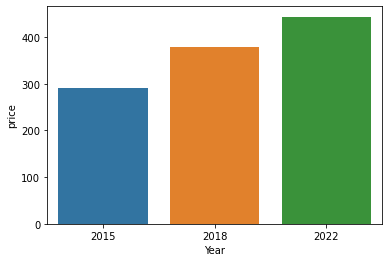

In [37]:
# by functional cycling area 
ax = sns.barplot(x = 'Year', y = 'price', data = Bikes_price_grouped)

In [38]:
# sample size 
Bikes_price_group = Bikes_price.groupby(Bikes_price.Year)\
[['price']].agg('count').reset_index()

Bikes_price_group

,Year,price
0,2015,802
1,2018,262
2,2022,264
